# Projeto de Análise de Dados - Venda de Produto Bancário

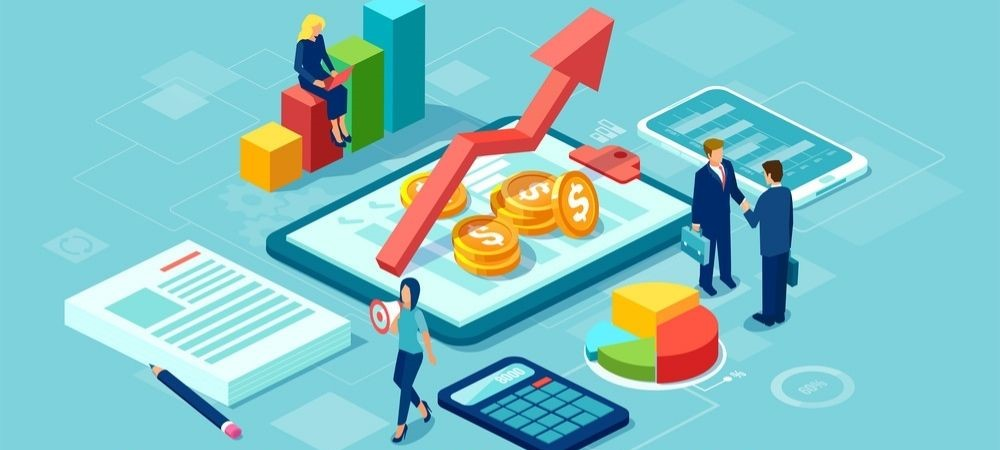

## 1. Contextualização

O Banco XPTOKW fez um levantamento de clientes que após tentativas de vendas de determinado produto financeiro, observaram quais aceitaram o produto e quais não aceitaram. Entretanto, para melhorar a eficiência de suas vendas eles te contrataram para realizar a análise destes dados e mostrar a eles algumas soluções para maximizar a eficiência em novas vendas.

Uma primeira reunião foi realizada contigo e um arquivo com os dados que eles levantaram foi te encaminhado, o arquivo se chama bank_marketing.xlsx.

Com os dados em mãos, você iniciou sua análise exploratória para responder as questões levantadas durante a reunião:

a) Qual o % de clientes que compraram o Título?

b) Quais profissões com maiores frequências são responsáveis por cerca de 80% da base? (Quais das técnicas aprendidas melhor leva a resposta a esta pergunta?)

c) Uma das frases ditas durante a reunião foi: “Podemos afirmar que 66% dos clientes não tem Ensino Superior”. Considerando os dados fornecidos, o que pode dizer sobre essa afirmação?

## 2. Pacotes e bibliotecas

In [1]:
import pandas as pd
import seaborn as sns
import openpyxl
import numpy as np
import helper as h

## 3. Carga dos dados

In [2]:
df_raw = pd.read_excel(r'data\bank_marketing.xlsx', engine='openpyxl',sheet_name='bank_marketing',header=1)

In [3]:
df_raw = df_raw.drop(columns='Unnamed: 0')
df_raw

,Cliente_Comprou_o_Titulo?,Idade,Profissão,Estado_Civil,Formação,Cliente_Devedor?,Saldo_Conta_Corrente,Tem_Hipoteca?,Tem_Emprestimo?,Qte_de_Ligações_Feitas
0,Não,33,Operário,Casado,Ensino Médio,Não,263,Sim,Não,3
1,Não,58,Aposentado,Casado,Ensino Médio,Não,19,Não,Sim,3
2,Sim,83,Aposentado,Casado,Fundamental,Não,425,Não,Não,1
3,Sim,32,Administrador,Solteiro,Ensino Superior,Não,10281,Não,Não,1
4,Sim,31,Administrador,Solteiro,Ensino Médio,Não,360,Sim,Não,1
...,...,...,...,...,...,...,...,...,...,...
9679,Não,30,Desempregado,Solteiro,Ensino Superior,Não,463,Não,Não,4
9680,Sim,57,Aposentado,Casado,Ensino Médio,Não,466,Não,Não,2
9681,Sim,39,Administrador,Solteiro,Ensino Superior,Não,307,Não,Não,2
9682,Sim,37,Técnico,Solteiro,Ensino Médio,Não,4,Não,Não,1


## 4. Descrição dos dados

Feature | Descrição | Tipo
------- | --------- | ----
Cliente_Comprou_o_Titulo? | Sim / Não | Qualitativa Nominal
Idade | Idade do cliente | Quantitativa Discreta
Profissão | Profissão do cliente | Qualitativa Nominal
Estado_Civil | Informa o estado civil do cliente | Qualitativa Ordinal
Formação | Grau de instrução do cliente | Qualitativa Nominal
Cliente_Devedor? | Sim / Não | Qualitativa Nominal
Saldo_Conta_Corrente | Informa o saldo da conta corrente do cliente | Quantitativa Contínua
Tem_Hipoteca? | Sim / Não | Qualitativa Nominal
Tem_Emprestimo? | Sim / Não | Qualitativa Nominal
Qte_de_Ligações_feitas | Número de ligações realizadas para o cliente | Quantitativa Discreta

In [4]:
df_raw.dtypes

Cliente_Comprou_o_Titulo?    object
Idade                         int64
Profissão                    object
Estado_Civil                 object
Formação                     object
Cliente_Devedor?             object
Saldo_Conta_Corrente          int64
Tem_Hipoteca?                object
Tem_Emprestimo?              object
Qte_de_Ligações_Feitas        int64
dtype: object

In [5]:
df_raw['Saldo_Conta_Corrente'] = df_raw['Saldo_Conta_Corrente'].astype('float64')
df_raw['Saldo_Conta_Corrente'].dtypes

dtype('float64')

In [6]:
df_raw.shape

(9684, 10)

In [7]:
df_raw.isna().sum()

Cliente_Comprou_o_Titulo?    0
Idade                        0
Profissão                    0
Estado_Civil                 0
Formação                     0
Cliente_Devedor?             0
Saldo_Conta_Corrente         0
Tem_Hipoteca?                0
Tem_Emprestimo?              0
Qte_de_Ligações_Feitas       0
dtype: int64

## 5. Resumo dos dados 

In [8]:
df1 = df_raw.copy()

### 5.1 - Estatística Descritiva (Unidimensional)

#### 5.1.1 - Tabela de Frequências

In [9]:
# Cliente_Comprou_o_Titulo?

display(h.frequencias_cat(df1,'Cliente_Comprou_o_Titulo?'))

,Cliente_Comprou_o_Titulo?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,4906,50.66,50.66
1,Sim,4778,49.34,100.00


In [10]:
# Idade

display(h.frequencias_num(df1,'Idade',10))

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(18, 28]",1087,11.24,11.24
1,"(28, 38]",3749,38.78,50.02
2,"(38, 48]",2295,23.74,73.76
3,"(48, 58]",1671,17.28,91.04
4,"(58, 68]",581,6.01,97.05
5,"(68, 78]",219,2.27,99.32
6,"(78, 88]",66,0.68,100.00


In [11]:
# Profissão

display(h.frequencias_cat(df1,'Profissão'))

,Profissão,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Administrador,3402,35.13,35.13
1,Operário,1621,16.74,51.87
2,Técnico,1582,16.34,68.21
3,Serviços Gerais,781,8.06,76.27
4,Aposentado,706,7.29,83.56
5,Autônomo,355,3.67,87.23
6,Estudante,344,3.55,90.78
7,Desempregado,317,3.27,94.05
8,Empresário,273,2.82,96.87
9,Diarista,240,2.48,99.35


In [12]:
# Estado_Civil 

ordem = ['Solteiro','Casado','Divorciado']

display(h.frequencias_cat(df1,'Estado_Civil',ordem))

,Estado_Civil,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
1,Solteiro,3159,32.62,32.62
0,Casado,5469,56.47,89.09
2,Divorciado,1056,10.90,99.99


In [13]:
# Formação

ordem = ['Fundamental','Ensino Médio','Ensino Superior','Desconhecido']

display(h.frequencias_cat(df1,'Formação',ordem))

,Formação,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
2,Fundamental,1267,13.08,13.08
0,Ensino Médio,4718,48.72,61.80
1,Ensino Superior,3247,33.53,95.33
3,Desconhecido,452,4.67,100.00


In [14]:
# Cliente_Devedor? 

display(h.frequencias_cat(df1,'Cliente_Devedor?'))

,Cliente_Devedor?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,9619,99.33,99.33
1,Sim,65,0.67,100.00


In [15]:
# Saldo_Conta_Corrente

display(h.frequencias_num(df1,'Saldo_Conta_Corrente',1500))

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(1.0, 1501.0]",6555,67.99,67.99
1,"(1501.0, 3001.0]",1528,15.85,83.84
2,"(3001.0, 4501.0]",657,6.81,90.65
3,"(4501.0, 6001.0]",357,3.70,94.35
4,"(6001.0, 7501.0]",167,1.73,96.08
5,"(7501.0, 9001.0]",126,1.31,97.39
6,"(9001.0, 10501.0]",65,0.67,98.06
7,"(10501.0, 12001.0]",59,0.61,98.67
8,"(12001.0, 13501.0]",39,0.40,99.07
9,"(13501.0, 15001.0]",20,0.21,99.28


In [16]:
# Tem_Hipoteca?

display(h.frequencias_cat(df1,'Tem_Hipoteca?'))

,Tem_Hipoteca?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,5260,54.32,54.32
1,Sim,4424,45.68,100.00


In [17]:
# Tem_Emprestimo?

display(h.frequencias_cat(df1,'Tem_Emprestimo?'))

,Tem_Emprestimo?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,8557,88.36,88.36
1,Sim,1127,11.64,100.00


In [18]:
# Qte_de_Ligações_Feitas

display(h.frequencias_num(df1,'Qte_de_Ligações_Feitas',5))

,Faixa,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,"(1, 6]",4987,91.09,91.09
1,"(6, 11]",359,6.56,97.65
2,"(11, 16]",72,1.32,98.97
3,"(16, 21]",32,0.58,99.55
4,"(21, 26]",12,0.22,99.77
5,"(26, 31]",8,0.15,99.92
6,"(31, 36]",3,0.05,99.97
7,"(36, 41]",1,0.02,99.99
8,"(41, 46]",1,0.02,100.01
9,"(46, 51]",0,0.00,100.01


## 6. Respondendo as questões 

Apenas resumindo os dados em tabelas de frequências, podemos tirar muitos insights e responder várias perguntas antes mesmo de continuar com o processo de análise exploratória dos dados.

No caso deste projeto, podemos responder as perguntas realizadas durante a reunião apenas com as tabelas de frequências criadas. 

Isso prova a importância de realizarmos a descrição dos dados em um projeto de Analytics ou DataScience.

Resposta dos questionamentos:

**a) Qual o % de clientes que compraram o Título?**

In [19]:
display(h.frequencias_cat(df1,'Cliente_Comprou_o_Titulo?'))

,Cliente_Comprou_o_Titulo?,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Não,4906,50.66,50.66
1,Sim,4778,49.34,100.00


**<font color="#0000FF">Podemos observar que 49,34 % dos clientes da base de dados adquiriram o título.</font>**

**b) Quais profissões com maiores frequências são responsáveis por cerca de 80% da base?**

In [20]:
display(h.frequencias_cat(df1,'Profissão'))

,Profissão,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
0,Administrador,3402,35.13,35.13
1,Operário,1621,16.74,51.87
2,Técnico,1582,16.34,68.21
3,Serviços Gerais,781,8.06,76.27
4,Aposentado,706,7.29,83.56
5,Autônomo,355,3.67,87.23
6,Estudante,344,3.55,90.78
7,Desempregado,317,3.27,94.05
8,Empresário,273,2.82,96.87
9,Diarista,240,2.48,99.35


**<font color="#0000FF">Analisando a tabela de frequência acima, podemos observar que: As profissões: Administrador(35,13%), Operário(16,74%), Técnico(16,34%), Serviços Gerais(8,06%) e Autônomo(3,67%) representam 79,94% da base de dados.</font>**

**c) Uma das frases ditas durante a reunião foi: “Podemos afirmar que 66% dos clientes não tem Ensino Superior”. Considerando os dados fornecidos, o que pode dizer sobre essa afirmação?**

In [21]:
ordem = ['Fundamental','Ensino Médio','Ensino Superior','Desconhecido']

display(h.frequencias_cat(df1,'Formação',ordem))

,Formação,Frequência Absoluta,Frequência Relativa %,Frequência Acumulada %
2,Fundamental,1267,13.08,13.08
0,Ensino Médio,4718,48.72,61.80
1,Ensino Superior,3247,33.53,95.33
3,Desconhecido,452,4.67,100.00


**<font color="#0000FF">Podemos observar na tabela de frequência acima que a afirmação NÃO É VERDADEIRA. Ou seja, observamos que 61,80% dos clientes tem até o Ensino Médio ou NÃO tem ensino superior.</font>**